In [1]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#importing dataset
data=pd.read_csv("Travel.csv")

In [3]:
data_new=data.replace('Fe Male',"Female")

In [8]:
#replacing missing categorical data with mode
data2=data_new.fillna({'TypeofContact':data_new['TypeofContact'].mode()[0]})
#replacing missing numerical data with mean
df_new=data2.fillna({"Age":data2['Age'].mean(),"DurationOfPitch":data2["DurationOfPitch"].mean(),"NumberOfFollowups":data2["NumberOfFollowups"].mean(),'NumberOfTrips':data2['NumberOfTrips'].mean(),'NumberOfChildrenVisiting':data2['NumberOfChildrenVisiting'].mean(),'MonthlyIncome':data2['MonthlyIncome'].mean()})

In [9]:
df_new.head()

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                       3   
1             14.0        Salaried    Male                       3   
2              8.0     Free Lancer    Male                       3   
3              9.0        Salaried  Female                       2   
4              8.0  Small Business    Male                       2   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                       0.0     Manager        20993.0  
1                       2.0     Manager        20130.0  
2                       0.0   Executive        17090.0  
3                       1.0   Executive        17909.0  
4                       0.0   Executive        18468.0

In [5]:
#outlier treatent
q1=df_new['DurationOfPitch'].quantile(0.25)
q3=df_new['DurationOfPitch'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)
data1=df_new[(df_new["DurationOfPitch"]>lower_limit) & (df_new["DurationOfPitch"]<upper_limit)]

In [6]:
q1=df_new["MonthlyIncome"].quantile(0.25)
q3=df_new["MonthlyIncome"].quantile(0.75)
IQR=q3-q1
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
data3=data1[(data1["MonthlyIncome"]<upper_limit) & (data1["MonthlyIncome"]>lower_limit)]

In [10]:
data3.head()

CustomerID  ProdTaken        Age    TypeofContact  CityTier  \
0      200000          1  41.000000     Self Enquiry         3   
1      200001          0  49.000000  Company Invited         1   
2      200002          1  37.000000     Self Enquiry         1   
3      200003          0  33.000000  Company Invited         1   
4      200004          0  37.622265     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0              6.0        Salaried  Female                       3   
1             14.0        Salaried    Male                       3   
2              8.0     Free Lancer    Male                       3   
3              9.0        Salaried  Female                       2   
4              8.0  Small Business    Male                       2   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                3.0         Deluxe                    3.0        Single   
1                4.0         Deluxe                    4.0      Divorced   
2                4.0          Basic                    3.0        Single   
3                3.0          Basic                    3.0      Divorced   
4                3.0          Basic                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0         1                       2       1   
1            2.0         0                       3       1   
2            7.0         1                       3       0   
3            2.0         1                       5       1   
4            1.0         0                       5       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                       0.0     Manager        20993.0  
1                       2.0     Manager        20130.0  
2                       0.0   Executive        17090.0  
3                       1.0   Executive        17909.0  
4                       0.0   Executive        18468.0

In [13]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols="TypeofContact")
data_encoded=encoder.fit_transform(data3)
data_encoded


CustomerID  ProdTaken        Age  TypeofContact_1  TypeofContact_2  \
0         200000          1  41.000000                1                0   
1         200001          0  49.000000                0                1   
2         200002          1  37.000000                1                0   
3         200003          0  33.000000                0                1   
4         200004          0  37.622265                1                0   
...          ...        ...        ...              ...              ...   
4883      204883          1  49.000000                1                0   
4884      204884          1  28.000000                0                1   
4885      204885          1  52.000000                1                0   
4886      204886          1  19.000000                1                0   
4887      204887          1  36.000000                1                0   

      CityTier  DurationOfPitch      Occupation  Gender  \
0            3              6.0        Salaried  Female   
1            1             14.0        Salaried    Male   
2            1              8.0     Free Lancer    Male   
3            1              9.0        Salaried  Female   
4            1              8.0  Small Business    Male   
...        ...              ...             ...     ...   
4883         3              9.0  Small Business    Male   
4884         1             31.0        Salaried    Male   
4885         3             17.0        Salaried  Female   
4886         3             16.0  Small Business    Male   
4887         1             14.0        Salaried    Male   

      NumberOfPersonVisiting  ...  ProductPitched PreferredPropertyStar  \
0                          3  ...          Deluxe                   3.0   
1                          3  ...          Deluxe                   4.0   
2                          3  ...           Basic                   3.0   
3                          2  ...           Basic                   3.0   
4                          2  ...           Basic                   4.0   
...                      ...  ...             ...                   ...   
4883                       3  ...          Deluxe                   4.0   
4884                       4  ...           Basic                   3.0   
4885                       4  ...        Standard                   4.0   
4886                       3  ...           Basic                   3.0   
4887                       4  ...           Basic                   4.0   

      MaritalStatus NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            Single           1.0         1                       2       1   
1          Divorced           2.0         0                       3       1   
2            Single           7.0         1                       3       0   
3          Divorced           2.0         1                       5       1   
4          Divorced           1.0         0                       5       1   
...             ...           ...       ...                     ...     ...   
4883      Unmarried           2.0         1                       1       1   
4884         Single           3.0         1                       3       1   
4885        Married           7.0         0                       1       1   
4886         Single           3.0         0                       5       0   
4887      Unmarried           3.0         1                       3       1   

      NumberOfChildrenVisiting     Designation MonthlyIncome  
0                          0.0         Manager       20993.0  
1                          2.0         Manager       20130.0  
2                          0.0       Executive       17090.0  
3                          1.0       Executive       17909.0  
4                          0.0       Executive       18468.0  
...                        ...             ...           ...  
4883                       1.0         Manager       26576.0  
4884                       2.0

In [14]:
encoder=ce.HashingEncoder(cols='Occupation',n_components=3)
encoded_data3=encoder.fit_transform(data_encoded)
encoded_data3

col_0  col_1  col_2  CustomerID  ProdTaken        Age  TypeofContact_1  \
0         1      0      0      200000          1  41.000000                1   
1         1      0      0      200001          0  49.000000                0   
2         0      1      0      200002          1  37.000000                1   
3         1      0      0      200003          0  33.000000                0   
4         0      1      0      200004          0  37.622265                1   
...     ...    ...    ...         ...        ...        ...              ...   
4883      0      1      0      204883          1  49.000000                1   
4884      1      0      0      204884          1  28.000000                0   
4885      1      0      0      204885          1  52.000000                1   
4886      0      1      0      204886          1  19.000000                1   
4887      1      0      0      204887          1  36.000000                1   

      TypeofContact_2  CityTier  DurationOfPitch  ... ProductPitched  \
0                   0         3              6.0  ...         Deluxe   
1                   1         1             14.0  ...         Deluxe   
2                   0         1              8.0  ...          Basic   
3                   1         1              9.0  ...          Basic   
4                   0         1              8.0  ...          Basic   
...               ...       ...              ...  ...            ...   
4883                0         3              9.0  ...         Deluxe   
4884                1         1             31.0  ...          Basic   
4885                0         3             17.0  ...       Standard   
4886                0         3             16.0  ...          Basic   
4887                0         1             14.0  ...          Basic   

      PreferredPropertyStar  MaritalStatus NumberOfTrips  Passport  \
0                       3.0         Single           1.0         1   
1                       4.0       Divorced           2.0         0   
2                       3.0         Single           7.0         1   
3                       3.0       Divorced           2.0         1   
4                       4.0       Divorced           1.0         0   
...                     ...            ...           ...       ...   
4883                    4.0      Unmarried           2.0         1   
4884                    3.0         Single           3.0         1   
4885                    4.0        Married           7.0         0   
4886                    3.0         Single           3.0         0   
4887                    4.0      Unmarried           3.0         1   

     PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting     Designation  \
0                         2       1                       0.0         Manager   
1                         3       1                       2.0         Manager   
2                         3       0                       0.0       Executive   
3                         5       1                       1.0       Executive   
4                         5       1                       0.0       Executive   
...                     ...     ...                       ...             ...   
4883                      1       1                       1.0         Manager   
4884                      3       1                       2.0       Executive   
4885                      1       1                       3.0  Senior Manager   
4886                      5       0                       2.0       Executive   
4887                      3       1                       2.0       Executive   

      MonthlyIncome  
0           20993.0  
1           20130.0  
2           17090.0  
3           17909.0  
4           18468.0  
...             ...  
4883        26576.0  
4884        21212.0  
4885        31820.0  
4886        20289.0  
4887        24041.0  

[4358 rows x 23 columns]

In [15]:
encoder=ce.BinaryEncoder(cols='Gender',return_df=True)
data_encoded4=encoder.fit_transform(encoded_data3)
data_encoded4

col_0  col_1  col_2  CustomerID  ProdTaken        Age  TypeofContact_1  \
0         1      0      0      200000          1  41.000000                1   
1         1      0      0      200001          0  49.000000                0   
2         0      1      0      200002          1  37.000000                1   
3         1      0      0      200003          0  33.000000                0   
4         0      1      0      200004          0  37.622265                1   
...     ...    ...    ...         ...        ...        ...              ...   
4883      0      1      0      204883          1  49.000000                1   
4884      1      0      0      204884          1  28.000000                0   
4885      1      0      0      204885          1  52.000000                1   
4886      0      1      0      204886          1  19.000000                1   
4887      1      0      0      204887          1  36.000000                1   

      TypeofContact_2  CityTier  DurationOfPitch  ...  ProductPitched  \
0                   0         3              6.0  ...          Deluxe   
1                   1         1             14.0  ...          Deluxe   
2                   0         1              8.0  ...           Basic   
3                   1         1              9.0  ...           Basic   
4                   0         1              8.0  ...           Basic   
...               ...       ...              ...  ...             ...   
4883                0         3              9.0  ...          Deluxe   
4884                1         1             31.0  ...           Basic   
4885                0         3             17.0  ...        Standard   
4886                0         3             16.0  ...           Basic   
4887                0         1             14.0  ...           Basic   

      PreferredPropertyStar  MaritalStatus  NumberOfTrips Passport  \
0                       3.0         Single            1.0        1   
1                       4.0       Divorced            2.0        0   
2                       3.0         Single            7.0        1   
3                       3.0       Divorced            2.0        1   
4                       4.0       Divorced            1.0        0   
...                     ...            ...            ...      ...   
4883                    4.0      Unmarried            2.0        1   
4884                    3.0         Single            3.0        1   
4885                    4.0        Married            7.0        0   
4886                    3.0         Single            3.0        0   
4887                    4.0      Unmarried            3.0        1   

      PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting     Designation  \
0                          2      1                       0.0         Manager   
1                          3      1                       2.0         Manager   
2                          3      0                       0.0       Executive   
3                          5      1                       1.0       Executive   
4                          5      1                       0.0       Executive   
...                      ...    ...                       ...             ...   
4883                       1      1                       1.0         Manager   
4884                       3      1                       2.0       Executive   
4885                       1      1                       3.0  Senior Manager   
4886                       5      0                       2.0       Executive   
4887                       3      1                       2.0       Executive   

      MonthlyIncome  
0           20993.0  
1           20130.0  
2           17090.0  
3           17909.0  
4           18468.0  
...             ...  
4883        26576.0  
4884        21212.0  
4885        31820.0  
4886        20289.0  
4887        24041.0  

[4358 rows x 24 columns]

In [16]:
encoder= ce.BaseNEncoder(cols=['ProductPitched'],return_df=True,base=3)
data_encoded5=encoder.fit_transform(data_encoded4)
data_encoded5

col_0  col_1  col_2  CustomerID  ProdTaken        Age  TypeofContact_1  \
0         1      0      0      200000          1  41.000000                1   
1         1      0      0      200001          0  49.000000                0   
2         0      1      0      200002          1  37.000000                1   
3         1      0      0      200003          0  33.000000                0   
4         0      1      0      200004          0  37.622265                1   
...     ...    ...    ...         ...        ...        ...              ...   
4883      0      1      0      204883          1  49.000000                1   
4884      1      0      0      204884          1  28.000000                0   
4885      1      0      0      204885          1  52.000000                1   
4886      0      1      0      204886          1  19.000000                1   
4887      1      0      0      204887          1  36.000000                1   

      TypeofContact_2  CityTier  DurationOfPitch  ...  ProductPitched_1  \
0                   0         3              6.0  ...                 1   
1                   1         1             14.0  ...                 1   
2                   0         1              8.0  ...                 2   
3                   1         1              9.0  ...                 2   
4                   0         1              8.0  ...                 2   
...               ...       ...              ...  ...               ...   
4883                0         3              9.0  ...                 1   
4884                1         1             31.0  ...                 2   
4885                0         3             17.0  ...                 0   
4886                0         3             16.0  ...                 2   
4887                0         1             14.0  ...                 2   

      PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  \
0                       3.0         Single            1.0         1   
1                       4.0       Divorced            2.0         0   
2                       3.0         Single            7.0         1   
3                       3.0       Divorced            2.0         1   
4                       4.0       Divorced            1.0         0   
...                     ...            ...            ...       ...   
4883                    4.0      Unmarried            2.0         1   
4884                    3.0         Single            3.0         1   
4885                    4.0        Married            7.0         0   
4886                    3.0         Single            3.0         0   
4887                    4.0      Unmarried            3.0         1   

      PitchSatisfactionScore  OwnCar NumberOfChildrenVisiting     Designation  \
0                          2       1                      0.0         Manager   
1                          3       1                      2.0         Manager   
2                          3       0                      0.0       Executive   
3                          5       1                      1.0       Executive   
4                          5       1                      0.0       Executive   
...                      ...     ...                      ...             ...   
4883                       1       1                      1.0         Manager   
4884                       3       1                      2.0       Executive   
4885                       1       1                      3.0  Senior Manager   
4886                       5       0                      2.0       Executive   
4887                       3       1                      2.0       Executive   

      MonthlyIncome  
0           20993.0  
1           20130.0  
2           17090.0  
3           17909.0  
4           18468.0  
...             ...  
4883        26576.0  
4884        21212.0  
4885        31820.0  
4886        20289.0  
4887        24041.0  

[4358 rows x 25 columns]

In [17]:
encoder=ce.OneHotEncoder(cols="MaritalStatus")
data_encoded6=encoder.fit_transform(data_encoded5)
data_encoded6

col_0  col_1  col_2  CustomerID  ProdTaken        Age  TypeofContact_1  \
0         1      0      0      200000          1  41.000000                1   
1         1      0      0      200001          0  49.000000                0   
2         0      1      0      200002          1  37.000000                1   
3         1      0      0      200003          0  33.000000                0   
4         0      1      0      200004          0  37.622265                1   
...     ...    ...    ...         ...        ...        ...              ...   
4883      0      1      0      204883          1  49.000000                1   
4884      1      0      0      204884          1  28.000000                0   
4885      1      0      0      204885          1  52.000000                1   
4886      0      1      0      204886          1  19.000000                1   
4887      1      0      0      204887          1  36.000000                1   

      TypeofContact_2  CityTier  DurationOfPitch  ...  MaritalStatus_2  \
0                   0         3              6.0  ...                0   
1                   1         1             14.0  ...                1   
2                   0         1              8.0  ...                0   
3                   1         1              9.0  ...                1   
4                   0         1              8.0  ...                1   
...               ...       ...              ...  ...              ...   
4883                0         3              9.0  ...                0   
4884                1         1             31.0  ...                0   
4885                0         3             17.0  ...                0   
4886                0         3             16.0  ...                0   
4887                0         1             14.0  ...                0   

      MaritalStatus_3  MaritalStatus_4  NumberOfTrips  Passport  \
0                   0                0            1.0         1   
1                   0                0            2.0         0   
2                   0                0            7.0         1   
3                   0                0            2.0         1   
4                   0                0            1.0         0   
...               ...              ...            ...       ...   
4883                0                1            2.0         1   
4884                0                0            3.0         1   
4885                1                0            7.0         0   
4886                0                0            3.0         0   
4887                0                1            3.0         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0                          2       1                       0.0   
1                          3       1                       2.0   
2                          3       0                       0.0   
3                          5       1                       1.0   
4                          5       1                       0.0   
...                      ...     ...                       ...   
4883                       1       1                       1.0   
4884                       3       1                       2.0   
4885                       1       1                       3.0   
4886                       5       0                       2.0   
4887                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[4358 rows x 28 columns]

In [21]:
encoder=ce.OneHotEncoder(cols="Designation")
encoded_data=encoder.fit_transform(data_encoded6)
encoded_data

col_0  col_1  col_2  CustomerID  ProdTaken        Age  TypeofContact_1  \
0         1      0      0      200000          1  41.000000                1   
1         1      0      0      200001          0  49.000000                0   
2         0      1      0      200002          1  37.000000                1   
3         1      0      0      200003          0  33.000000                0   
4         0      1      0      200004          0  37.622265                1   
...     ...    ...    ...         ...        ...        ...              ...   
4883      0      1      0      204883          1  49.000000                1   
4884      1      0      0      204884          1  28.000000                0   
4885      1      0      0      204885          1  52.000000                1   
4886      0      1      0      204886          1  19.000000                1   
4887      1      0      0      204887          1  36.000000                1   

      TypeofContact_2  CityTier  DurationOfPitch  ...  Passport  \
0                   0         3              6.0  ...         1   
1                   1         1             14.0  ...         0   
2                   0         1              8.0  ...         1   
3                   1         1              9.0  ...         1   
4                   0         1              8.0  ...         0   
...               ...       ...              ...  ...       ...   
4883                0         3              9.0  ...         1   
4884                1         1             31.0  ...         1   
4885                0         3             17.0  ...         0   
4886                0         3             16.0  ...         0   
4887                0         1             14.0  ...         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation_1  \
0                          2       1                       0.0              1   
1                          3       1                       2.0              1   
2                          3       0                       0.0              0   
3                          5       1                       1.0              0   
4                          5       1                       0.0              0   
...                      ...     ...                       ...            ...   
4883                       1       1                       1.0              1   
4884                       3       1                       2.0              0   
4885                       1       1                       3.0              0   
4886                       5       0                       2.0              0   
4887                       3       1                       2.0              0   

      Designation_2  Designation_3  Designation_4  Designation_5  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 1              0              0              0   
3                 1              0              0              0   
4                 1              0              0              0   
...             ...            ...            ...            ...   
4883              0              0              0              0   
4884              1              0              0              0   
4885              0              1              0              0   
4886              1              0              0              0   
4887              1              0              0              0   

      MonthlyIncome  
0           20993.0  
1           20130.0  
2           17090.0  
3           17909.0  
4           18468.0  
...             ...  
4883        26576.0  
4884        21212.0  
4885        31820.0  
4886        20289.0  
4887        24041.0  

[4358 rows x 32 columns]

# min max scaling

In [39]:
data_scaled=encoded_data.copy()
features=data_scaled[["MonthlyIncome","Age"]]

In [43]:
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
#appy scaling to selected features
data_scaled[["MonthlyIncome","Age"]]=Scaler.fit_transform(features.values)

In [44]:
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0          0.297197  0.534884
1          0.245736  0.720930
2          0.064460  0.441860
3          0.113298  0.348837
4          0.146631  0.456332
...             ...       ...
4883       0.630113  0.720930
4884       0.310256  0.232558
4885       0.942815  0.790698
4886       0.255218  0.023256
4887       0.478951  0.418605

[4358 rows x 2 columns]

# Standard scaler

In [45]:
#importing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)


In [47]:
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0         -0.417054  0.494240
1         -0.648923  1.407981
2         -1.465705  0.037369
3         -1.245657 -0.419501
4         -1.095466  0.108443
...             ...       ...
4883       1.082976  1.407981
4884      -0.358214 -0.990589
4885       2.491923  1.750634
4886      -0.606204 -2.018548
4887       0.401877 -0.076848

[4358 rows x 2 columns]

# MaxAbsScaler

In [48]:
# importng the libraries
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)


In [49]:
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0          0.640441  0.672131
1          0.614113  0.803279
2          0.521370  0.606557
3          0.546356  0.540984
4          0.563409  0.616758
...             ...       ...
4883       0.810763  0.803279
4884       0.647122  0.459016
4885       0.970743  0.852459
4886       0.618963  0.311475
4887       0.733427  0.590164

[4358 rows x 2 columns]

# Robust Scaler

In [50]:
# importng the libraries
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)

In [51]:
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0         -0.243354  0.500000
1         -0.447747  1.300000
2         -1.167742  0.100000
3         -0.973770 -0.300000
4         -0.841376  0.162227
...             ...       ...
4883       1.078927  1.300000
4884      -0.191486 -0.800000
4885       2.320919  1.600000
4886      -0.410089 -1.700000
4887       0.478536  0.000000

[4358 rows x 2 columns]

# Quantile Transformer Scaler

In [53]:
#importng the libraries
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)

In [54]:
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0          0.342342  0.735235
1          0.243277  0.892893
2          0.025649  0.551051
3          0.141141  0.357858
4          0.177185  0.596597
...             ...       ...
4883       0.862863  0.892893
4884       0.385309  0.149149
4885       0.973974  0.928929
4886       0.256674  0.007007
4887       0.722356  0.504505

[4358 rows x 2 columns]

# Log Transform

In [62]:
#creating a new col to store the log values
data_scaled["log_MonthlyIncome"]=np.log(encoded_data["MonthlyIncome"])
data_scaled["log_Age"]=np.log(encoded_data["Age"])



<AxesSubplot:ylabel='Frequency'>

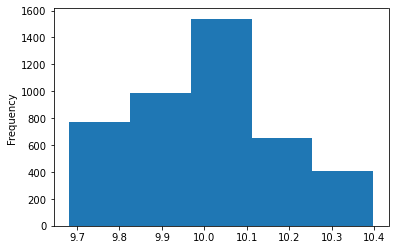

In [63]:
data_scaled["log_MonthlyIncome"].plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

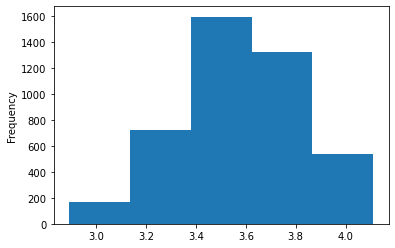

In [64]:
data_scaled["log_Age"].plot.hist(bins=5)

# Power Transformer Scaler

In [67]:
#BOX COX transform
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)

In [68]:
data_scaled

col_0  col_1  col_2  CustomerID  ProdTaken       Age  TypeofContact_1  \
0         1      0      0      200000          1  0.567318                1   
1         1      0      0      200001          0  1.348665                0   
2         0      1      0      200002          1  0.130722                1   
3         1      0      0      200003          0 -0.344666                0   
4         0      1      0      200004          0  0.201002                1   
...     ...    ...    ...         ...        ...       ...              ...   
4883      0      1      0      204883          1  1.348665                1   
4884      1      0      0      204884          1 -1.007255                0   
4885      1      0      0      204885          1  1.615864                1   
4886      0      1      0      204886          1 -2.481359                1   
4887      1      0      0      204887          1  0.015810                1   

      TypeofContact_2  CityTier  DurationOfPitch  ...  OwnCar  \
0                   0         3              6.0  ...       1   
1                   1         1             14.0  ...       1   
2                   0         1              8.0  ...       0   
3                   1         1              9.0  ...       1   
4                   0         1              8.0  ...       1   
...               ...       ...              ...  ...     ...   
4883                0         3              9.0  ...       1   
4884                1         1             31.0  ...       1   
4885                0         3             17.0  ...       1   
4886                0         3             16.0  ...       0   
4887                0         1             14.0  ...       1   

      NumberOfChildrenVisiting  Designation_1  Designation_2  Designation_3  \
0                          0.0              1              0              0   
1                          2.0              1              0              0   
2                          0.0              0              1              0   
3                          1.0              0              1              0   
4                          0.0              0              1              0   
...                        ...            ...            ...            ...   
4883                       1.0              1              0              0   
4884                       2.0              0              1              0   
4885                       3.0              0              0              1   
4886                       2.0              0              1              0   
4887                       2.0              0              1              0   

      Designation_4  Designation_5  MonthlyIncome  log_MonthlyIncome   log_Age  
0                 0              0      -0.321319           9.951944  3.713572  
1                 0              0      -0.594803           9.909967  3.891820  
2                 0              0      -1.727119           9.746249  3.610918  
3                 0              0      -1.392363           9.793059  3.496508  
4                 0              0      -1.177430           9.823795  3.627596  
...             ...            ...            ...                ...       ...  
4883              0              0       1.097625          10.187764  3.891820  
4884              0              0      -0.254722           9.962322  3.332205  
4885              0              0       2.058231          10.367850  3.951244  
4886              0              0      -0.543039           9.917834  2.944439  
4887              0              0       0.517961          10.087516  3.583519  

[4358 rows x 34 columns]

# Unit Vector Scaler/Normalizer

In [69]:
#l2 is default
from sklearn.preprocessing import Normalizer
scaler=Normalizer(norm="l2")
data_scaled[["MonthlyIncome","Age"]]=scaler.fit_transform(features.values)
data_scaled[["MonthlyIncome","Age"]]

MonthlyIncome       Age
0          0.999998  0.001953
1          0.999997  0.002434
2          0.999998  0.002165
3          0.999998  0.001843
4          0.999998  0.002037
...             ...       ...
4883       0.999998  0.001844
4884       0.999999  0.001320
4885       0.999999  0.001634
4886       1.000000  0.000936
4887       0.999999  0.001497

[4358 rows x 2 columns]